In [1]:
import scipy.stats as stats
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt

In [2]:
%matplotlib inline

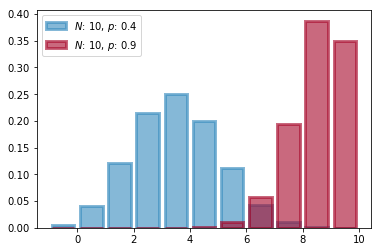

In [3]:
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p),
            color=colors[i], edgecolor=colors[i],
            alpha=0.6, lw=3,
            label='$N$: {}, $p$: {}'.format(N, p))
    
plt.legend()

    

               

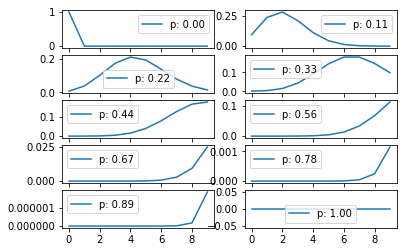

In [4]:
prob = np.linspace(0,1,10)
N = 20
x = np.arange(10)

for i in range(10):
    ax = plt.subplot(5,2,i+1)
    ax.plot(x, binomial.pmf(x, N, prob[i]), label='p: {:.2f}'.format(prob[i]))
    plt.legend()

## cheating amoung students

N =100

with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    true_answers = pm.Bernoulli('truths', p, shape=N,
                                testval=np.random.binomial(1, 0.5, N))
    
    first_coin_flips = pm.Bernoulli('first_flips', 0.5, shape=N,
                                   testval=np.random.binomial(1, 0.5, N))
    
    second_coin_flips = pm.Bernoulli('second_flips', 0.5, shape=N,
                                    testval=np.random.binomial(1, 0.5, N))
    
    val = first_coin_flips*true_answers + (1 - first_coin_flips)*second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", tt.sum(val)/float(N))

first_coin_flips.tag.test_value

X = 35
with model:
    observations = pm.Binomial('obs', N, observed_proportion, observed=X)

with model:
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(1000, step=step)
    

sns.distplot(trace['p'])

In [15]:
# my own
N = 100
X = 13

with pm.Model() as model:
    
    p = pm.Uniform('p', 0, 1)
    truth = pm.Bernoulli('truth', p, N)
    first_flip = pm.Bernoulli('first', 0.5, N)
    second_flip = pm.Bernoulli('seound', 0.5, N)
    
    val = first_flip*truth + (1-first_flip)*second_flip
    proportion = pm.Deterministic('prop', tt.sum(val)/float(N))
    
    obs = pm.Binomial('obs', N, proportion, observed=X)

/home/nol/anaconda3/envs/snowflake/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [ ]:
with model:
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(1000, step=step)
    burned_trace = trace[15:]

Assigned BinaryGibbsMetropolis to truth
Assigned BinaryGibbsMetropolis to first
Assigned BinaryGibbsMetropolis to seound
 65%|██████▍   | 649/1000 [01:27<00:46,  7.53it/s]

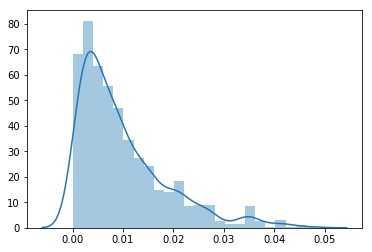

In [13]:
sns.distplot(burned_trace['p'])